<a href="https://colab.research.google.com/github/techmonk6969/Algorithmic-Trading-using-Python/blob/main/Exploratory_Data_Analysis_of_Mutual_Funds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis of Mutual Funds of India - March 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset contains below columns
- scheme_name: The name of the mutual fund scheme
- min_sip: The minimum amount required for a Systematic Investment Plan (SIP) investment in the fund
- min_lumpsum: The minimum amount required for a lump sum investment in the fund
- expense_ratio: The expense ratio of the fund
- fund_size_cr: The size of the fund in crore (10 million) units
- fund_age_yr: The age of the fund in years
- fund_manager: The name of the fund manager
- sortino: The Sortino ratio of the fund, which measures the risk-adjusted return of the fund
- alpha: The alpha of the fund, which measures the excess return of the fund compared to its benchmark
- sd: The standard deviation of the fund's returns
- beta: The beta of the fund, which measures the sensitivity of the fund's returns to the market
- sharpe: The Sharpe ratio of the fund, which measures the risk-adjusted return of the fund relative to a risk-free asset
- risk_level: The risk level of the fund, categorized as Very High,High, Moderately High, Moderately Low, or Low
- amc_name: The name of the asset management company that manages the fund
- rating: The rating of the fund on a scale of 1 to 5, with 1 being the lowest and 5 being the highest
- category: The category of the fund, such as Equity, Debt, or Hybrid
- sub_category: The sub-category of the fund, such as Large Cap, Small Cap, Floater Mutual Funds, etc.
- returns_1yr: The return of the fund in the past year
- returns_3yr: The return of the fund in the past 3 years
- returns_5yr: The return of the fund in the past 5 years

In [2]:
# loading the csv file
df= pd.read_csv('/content/comprehensive_mutual_funds_data.csv')
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [3]:
df['risk_level'].replace({1:'Low',2:'Moderately Low',3:'Moderate',4:'Moderately High',5:'High',6:'Very High'},inplace=True)

/tmp/ipython-input-3606425650.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['risk_level'].replace({1:'Low',2:'Moderately Low',3:'Moderate',4:'Moderately High',5:'High',6:'Very High'},inplace=True)


In [4]:
# checking the size of data (rows,columns)
df.shape

(814, 20)

In [5]:
# checking for missing values and column datatypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    object 
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [6]:
# checking for missing values
df.isnull().sum()

,0
scheme_name,0
min_sip,0
min_lumpsum,0
expense_ratio,0
fund_size_cr,0
fund_age_yr,0
fund_manager,0
sortino,0
alpha,0
sd,0


We will try to find why sortino, alpha, sd,beta,share,returns_3yr and returns_5yr data is missing

In [7]:
# checking for duplicate rows if any
df.duplicated().sum()

np.int64(0)

In [8]:
# Lets investigate why there are missing values in returns_3yr and returns_5yr
df[df['returns_3yr'].isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
61,AXIS Floater Fund,1000,5000,0.16,416.0,2,Aditya Pagaria,-,-,-,-,-,Moderately Low,Axis Mutual Fund,2,Debt,Floater Mutual Funds,5.8,NaN,NaN
104,Baroda BNP Paribas Banking & PSU Bond Fund,500,5000,0.39,40.0,2,Prashant Pimple,-,-,-,-,-,Moderately Low,Baroda BNP Paribas Mutual Fund,2,Debt,Banking and PSU Mutual Funds,2.5,NaN,NaN
125,BHARAT Bond FOF – April 2025 – Direct Growth,500,1000,0.06,3912.0,3,Dhawal Dalal,-,-,-,-,-,Moderately Low,Edelweiss Mutual Fund,2,Other,FoFs Domestic,2.6,NaN,NaN
154,DSP Floater Fund,500,500,0.24,983.0,2,Kedar Karnik,-,-,-,-,-,Moderately Low,DSP Mutual Fund,1,Debt,Floater Mutual Funds,4.4,NaN,NaN
398,Invesco India Medium Duration Fund,1000,1000,0.40,306.0,2,Vikas Garg,-,-,-,-,-,Moderate,Invesco Mutual Fund,2,Debt,Medium Duration Funds,3.5,NaN,NaN
411,ITI Banking & PSU Debt Fund,500,5000,0.15,27.0,2,Vikrant Mehta,-,-,-,-,-,Moderately Low,ITI Mutual Fund,5,Debt,Banking and PSU Mutual Funds,5.4,NaN,NaN
412,ITI Dynamic Bond Fund,500,5000,0.14,57.0,2,Vikrant Mehta,-,-,-,-,-,Moderately Low,ITI Mutual Fund,5,Debt,Dynamic Bond,5.7,NaN,NaN
417,ITI Ultra Short Duration Fund,500,5000,0.10,119.0,2,Vikrant Mehta,-,-,-,-,-,Moderately Low,ITI Mutual Fund,2,Debt,Ultra Short Duration Funds,5.3,NaN,NaN
495,Mahindra Manulife Short Duration Fund,500,1000,0.29,43.0,2,Rahul Pal,-,-,-,-,-,Moderate,Mahindra Manulife Mutual Fund,3,Debt,Short Duration Funds,4.4,NaN,NaN
497,Mirae Asset Banking and PSU Debt Fund,1000,5000,0.34,89.0,3,Basant Bafna,-,-,-,-,-,Moderately Low,Mirae Asset Mutual Fund,3,Debt,Banking and PSU Mutual Funds,3.7,NaN,NaN


We find that there are missing values in sortino, alpha,beta,sd,sharpe, returns_3yr and returns_5yr since fund age is less than 3 years
It seems that sortino, alpha,beta,sd,sharpe ratios are calculated considering 3 years data

In [9]:
df[df['returns_5yr'].isnull()]

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
38,Aditya Birla SL Overnight Fund,0,5000,0.07,13399.0,4,Kaustubh Gupta,0.11,0.58,0.35,0.43,0.02,Low,Aditya Birla Sun Life Mutual Fund,3,Debt,Overnight Mutual Funds,5.4,3.9,NaN
41,Aditya Birla SL Retirement-The 30s Plan-Dir Gr...,500,1000,1.06,258.0,4,Dhaval Shah,2.41,-5.61,14.94,0.84,0.94,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,0.0,17.9,NaN
42,Aditya Birla SL Retirement-The 40s Plan-Dir Gr...,500,1000,1.07,91.0,4,Dhaval Shah,2.34,-3.14,11.86,0.77,0.93,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,-0.1,15.0,NaN
43,Aditya Birla SL Retirement-The 50s Plan-Dir Gr...,500,1000,0.63,27.0,4,Dhaval Shah,0.29,-2.04,2.99,0.34,0.13,Moderately High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Retirement Funds,3.0,4.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,UTI-Equity Savings Fund,0,5000,0.68,257.0,5,V Srivatsa,4.06,3.98,5.99,0.91,1.75,Moderate,UTI Mutual Fund,4,Hybrid,Equity Savings Mutual Funds,6.1,14.7,NaN
786,UTI-Floater Fund,500,500,0.35,1637.0,4,Sudhir Agrawal,3.07,3.41,1.05,1.41,1.45,Moderately Low,UTI Mutual Fund,3,Debt,Floater Mutual Funds,5.1,5.9,NaN
801,UTI-Nifty Next 50 Index Fund,0,5000,0.33,1926.0,5,Sharwan Kumar Goyal,1.71,-4.62,18.16,0.99,0.97,Very High,UTI Mutual Fund,2,Other,Index Funds,-6.4,22.2,NaN
811,WhiteOak Capital Liquid Fund,500,500,0.26,197.0,4,Piyush Baranwal,-0.42,0.93,0.39,0.72,-0.07,Low,WhiteOak Capital Mutual Fund,1,Debt,Liquid Mutual Funds,5.3,3.8,NaN


Clearly missing values in returns_5yr is there as fund age is not greater than 5 years

In [11]:
# mean returns across category
mean_returns_by_category = df.groupby('category')[['returns_3yr','returns_5yr']].mean()
display(mean_returns_by_category)

,returns_3yr,returns_5yr
category,,
Debt,6.228517,6.385446
Equity,29.738111,12.069767
Hybrid,15.272414,8.581053
Other,20.792405,10.710938
Solution Oriented,18.167857,9.747059


In [14]:
# mean performance ratios across category
for col in ['sortino','alpha','sd','beta','sharpe']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

mean_ratios_by_category = df.groupby('category')[['sortino','alpha','sd','beta','sharpe']].mean()
mean_ratios_by_category

,sortino,alpha,sd,beta,sharpe
category,,,,,
Debt,2.139885,2.160000,2.092107,0.807214,0.892366
Equity,3.110392,3.402550,16.959477,0.878642,1.459837
Hybrid,2.776552,2.486034,7.493190,0.707155,1.311638
Other,2.420633,0.513594,15.480506,0.850938,1.090253
Solution Oriented,2.589286,0.700357,10.272143,0.765714,1.204286


In [16]:
# imputing missing values with mean of category

df['returns_3yr'] = df.groupby('category')['returns_3yr'].transform(lambda x: x.fillna(x.mean()))
df['returns_5yr'] = df.groupby('category')['returns_5yr'].transform(lambda x: x.fillna(x.mean()))
df['sortino'] = df.groupby('category')['sortino'].transform(lambda x: x.fillna(x.mean()))
df['alpha'] = df.groupby('category')['alpha'].transform(lambda x: x.fillna(x.mean()))
df['sd'] = df.groupby('category')['sd'].transform(lambda x: x.fillna(x.mean()))
df['beta'] = df.groupby('category')['beta'].transform(lambda x: x.fillna(x.mean()))
df['sharpe'] = df.groupby('category')['sharpe'].transform(lambda x: x.fillna(x.mean()))

In [17]:
# verifying missing values are imputed
df.isnull().sum()

,0
scheme_name,0
min_sip,0
min_lumpsum,0
expense_ratio,0
fund_size_cr,0
fund_age_yr,0
fund_manager,0
sortino,0
alpha,0
sd,0


In [18]:
# checking statistics of numerical columns
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,2.640883,2.464598,10.084476,0.822852,1.197011,2.641278,3.921376,18.254880,9.389900
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.374909,3.859215,7.808093,1.275605,0.531163,1.463476,6.675502,12.101639,3.497044
min,0.000000,0.000000,0.000000,2.380000,1.000000,-1.770000,-13.360000,0.270000,-31.860000,-0.820000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,1.810000,0.513594,2.092107,0.710000,0.894275,2.000000,1.500000,6.228517,6.389085
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,2.825000,1.885000,11.870000,0.850938,1.290000,3.000000,4.400000,18.050000,8.800000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,3.460000,3.727500,16.410000,0.960000,1.540000,4.000000,5.600000,27.000000,12.069767
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,12.570000,27.240000,77.720000,5.400000,3.520000,5.000000,130.800000,71.400000,23.200000


There seems to be presence of outliers in columns min_lumpsum, fund_size_cr as mean and median differ significantly

In [19]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,Moderate,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.900000
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.10,Low,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.500000
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,High,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.700000
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.90,Very High,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,9.747059
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,Very High,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.700000


## Analysis on fund_manager

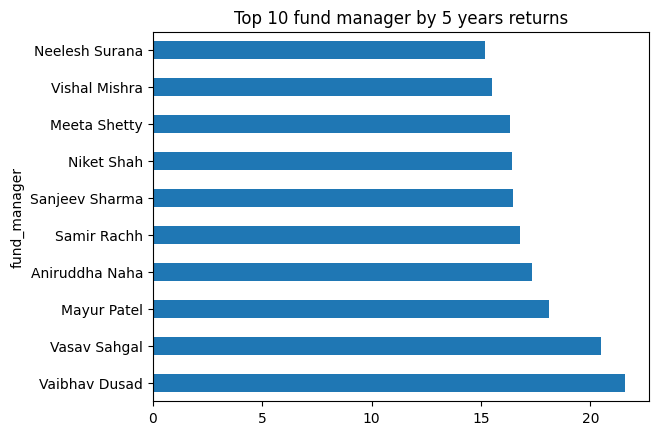

In [20]:
# fund manager with highest returns in 5 years

df.groupby(['fund_manager'])['returns_5yr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.title('Top 10 fund manager by 5 years returns')

plt.show()

In [21]:
# creating category wise dataframes

debt_df = df[df['category'] == 'Debt']
equity_df = df[df['category'] == 'Equity']
hybrid_df = df[df['category'] == 'Hybrid']
other_df = df[df['category'] == 'Other']
solution_df = df[df['category'] == 'Solution Oriented']

In [22]:
# calculating top 5 fund manager with avg highest returns in each category

top_5_debt = debt_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_equity = equity_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_hybrid = hybrid_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_solution = solution_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()
top_5_other = other_df.groupby('fund_manager')['returns_5yr'].mean().sort_values(ascending=False).head().reset_index()

/tmp/ipython-input-1075014853.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(top_5_debt['fund_manager'],rotation='vertical')
/tmp/ipython-input-1075014853.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(top_5_equity['fund_manager'],rotation='vertical')
/tmp/ipython-input-1075014853.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(top_5_hybrid['fund_manager'],rotation='vertical')
/tmp/ipython-input-1075014853.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(top_5_solution['fund_manager'],rotation='vertical')
/tmp/ipython-input-1075014853.py:19: UserWar

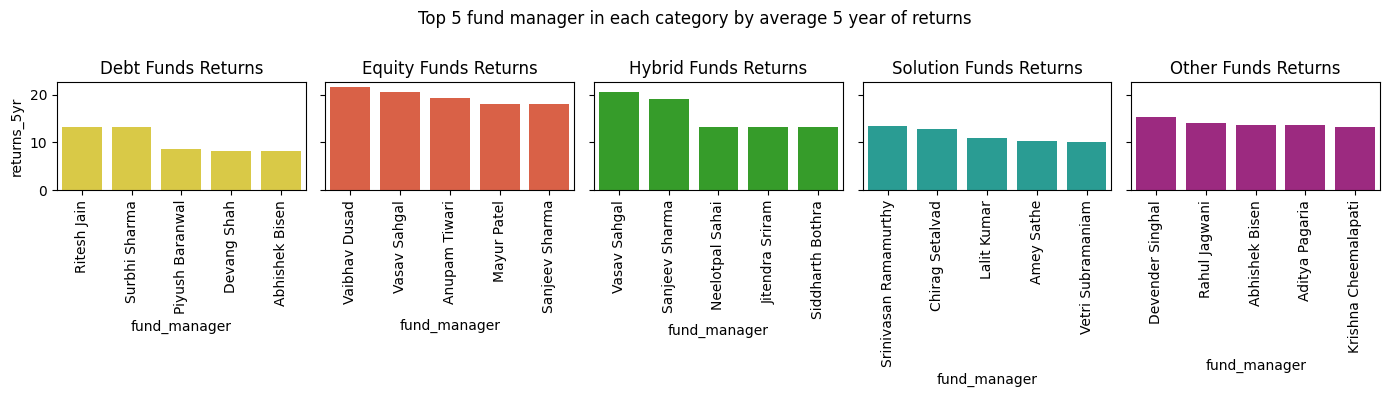

In [23]:
# create the plot
fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(14, 4),sharey='row')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_debt, ax=ax[0],color='#F1DC2F')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_equity, ax=ax[1],color='#F1512F')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_hybrid, ax=ax[2],color='#27AF17')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_solution, ax=ax[3],color='#17AFA3')
sns.barplot(x='fund_manager', y='returns_5yr', data=top_5_other, ax=ax[4],color='#AF178A')

# set plot title and x labels
ax[0].set_title('Debt Funds Returns')
ax[0].set_xticklabels(top_5_debt['fund_manager'],rotation='vertical')
ax[1].set_title('Equity Funds Returns')
ax[1].set_xticklabels(top_5_equity['fund_manager'],rotation='vertical')
ax[2].set_title('Hybrid Funds Returns')
ax[2].set_xticklabels(top_5_hybrid['fund_manager'],rotation='vertical')
ax[3].set_title('Solution Funds Returns')
ax[3].set_xticklabels(top_5_solution['fund_manager'],rotation='vertical')
ax[4].set_title('Other Funds Returns')
ax[4].set_xticklabels(top_5_other['fund_manager'],rotation='vertical')

# show the plot
plt.tight_layout()
plt.suptitle('Top 5 fund manager in each category by average 5 year of returns')
plt.subplots_adjust(top=0.8)
plt.show()

Conclusion
- There are 3 fund manager in Debt Funds having higher returns among top 5 fund manager.
- In the Equity category Vaibhav Dusad has managed to give highest returns.
- In the Hybrid category Vasav Sahgal has managed to give highest returns.
- In the Solution Funds category Srinivasan Ramamurthy has managed to give highest returns.
- In the Other Funds category Devender Singhal has managed to give highest returns.

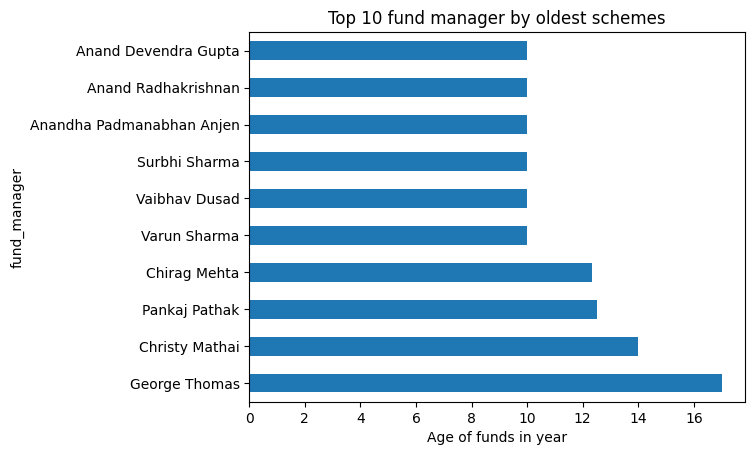

In [25]:
# top 10 fund manager by the mean age of funds
df.groupby(['fund_manager'])['fund_age_yr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.xlabel('Age of funds in year')
plt.title('Top 10 fund manager by oldest schemes')
plt.show()

Conclusion
- George Thomas is managing a fund which is the oldest among our dataset.

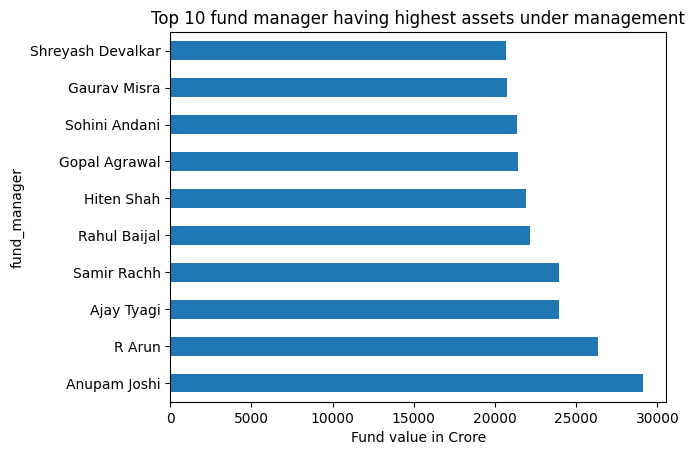

In [26]:
# top 10 fund manager by the assets under management
df.groupby(['fund_manager'])['fund_size_cr'].mean().sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.xlabel('Fund value in Crore')
plt.title('Top 10 fund manager having highest assets under management')
plt.show()


Conclusion
- Anupam Joshi has the highest AUM.

## Analysis on min_sip and min_lumpsum

<Axes: ylabel='min_sip'>

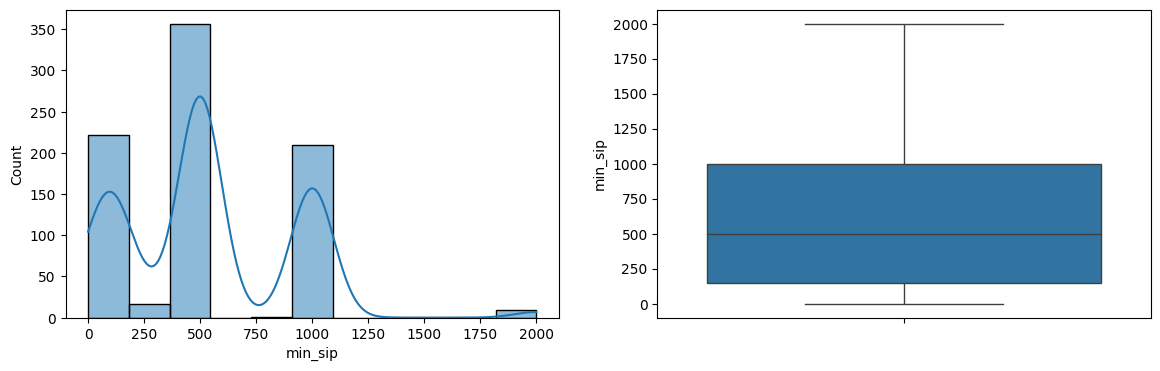

In [27]:
# distribution of min_sip
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(df['min_sip'],ax=ax[0],kde=True)
sns.boxplot(df['min_sip'],ax=ax[1])

Conclusion
- Most of the funds have Minimum SIP amount as 0,500 and 1000

<Axes: ylabel='min_lumpsum'>

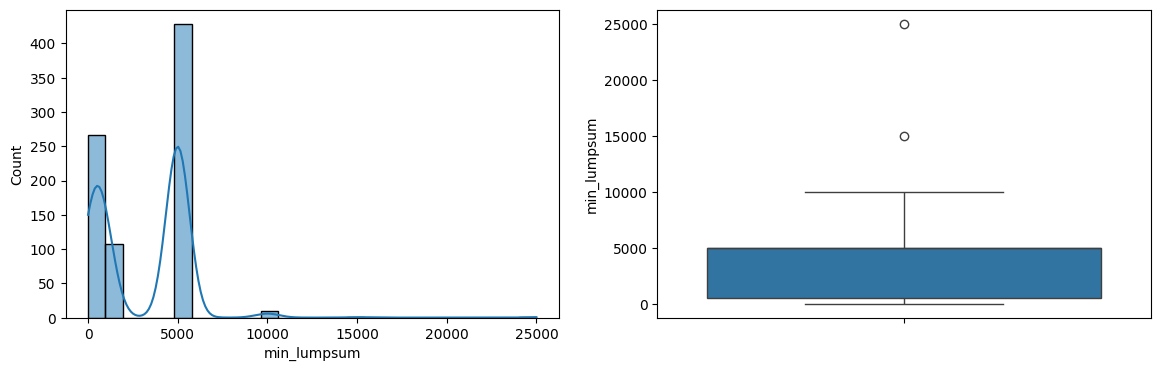

In [28]:
# distribution of min_lumpsum
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(14, 4))

sns.histplot(df['min_lumpsum'],ax=ax[0],kde=True)
sns.boxplot(df['min_lumpsum'],ax=ax[1])

Conclusion
- Most of the funds have Minimum Lumpsum amount between 0 to 5000

## Analysis on expense ratio
- The expense ratio measures how much of a fund's assets are used for administrative and other operating expenses.
- A mutual fund expense ratio that is at or below its peer average is ideal.

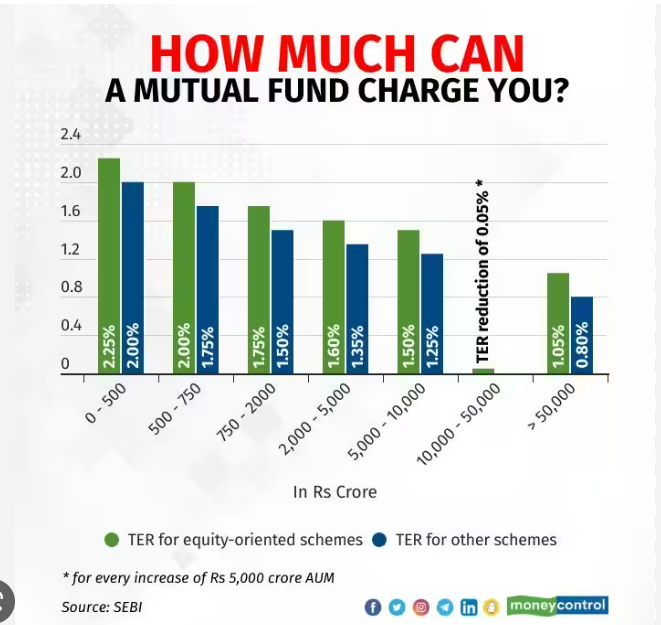

In [73]:
# create a function to make a category columns with above fund size

def fund_size_group(fund_size):
    if fund_size >= 0.0 and fund_size <= 500.0:
        return '0-500'
    elif fund_size > 500.0 and fund_size <= 750.0:
        return '500-750'
    elif fund_size > 750.0 and fund_size <= 2000.0:
        return '750-2000'
    elif fund_size > 2000.0 and fund_size <= 5000.0:
        return '2000-5000'
    elif fund_size > 5000.0 and fund_size <= 10000.0:
        return '5000-10000'
    elif fund_size > 10000.0 and fund_size <= 50000.0:
        return '10000-50000'
    else:
        return '>50000'

In [74]:
# create a column with above fund size group
df['fund_size_group'] = df['fund_size_cr'].apply(fund_size_group)

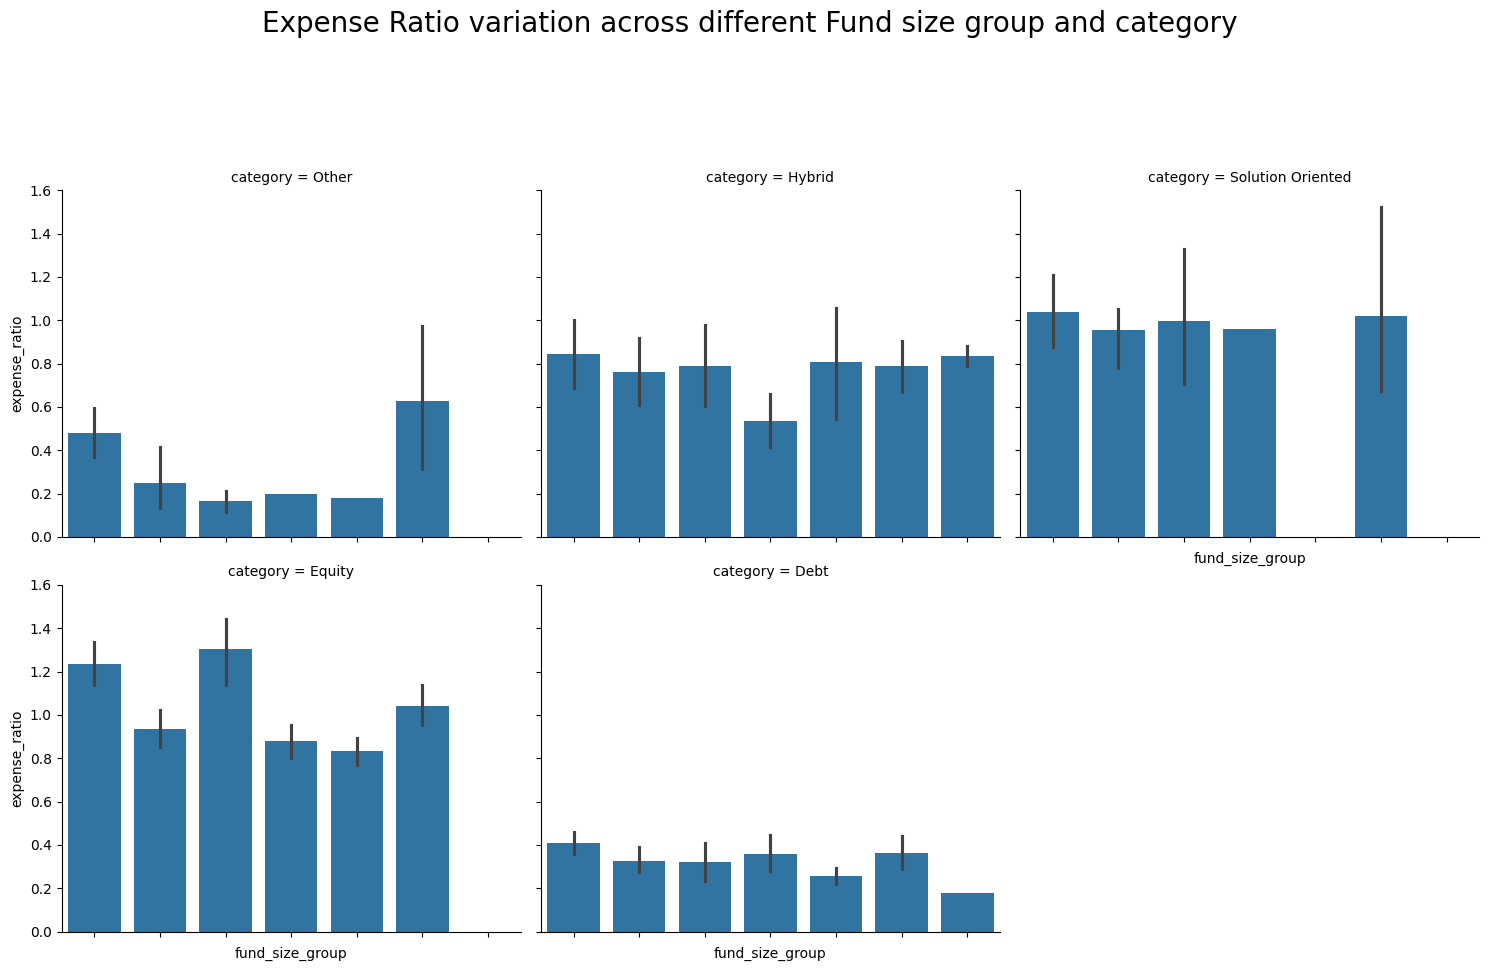

In [75]:
# expense ratio variation with fund size group across different category

# Create the categorical plot with subplots
g = sns.catplot(data=df, x='fund_size_group', y='expense_ratio', kind='bar', col='category', col_wrap=3)

# Set the rotation of the x-axis tick labels for all subplots
g.set_xticklabels(rotation='vertical')

# set the super title
plt.suptitle('Expense Ratio variation across different Fund size group and category',fontsize=20)
plt.subplots_adjust(top=0.8)

# Show the plot
plt.show()

Findings:
- Large fund size does have low expense ratio.

- Debt has the lowest 'expense ratio' amongs the funds.

## Analysis on fund size

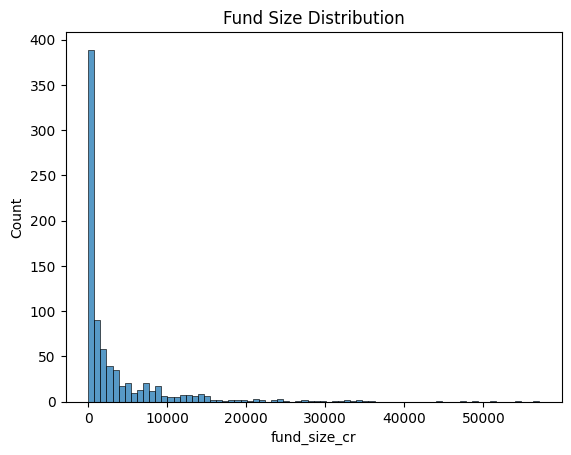

In [41]:
# distribution of fund size
sns.histplot(df['fund_size_cr'])
plt.title('Fund Size Distribution')
plt.show()

Findings
- Most of the fund size is less than 2000 Cr.

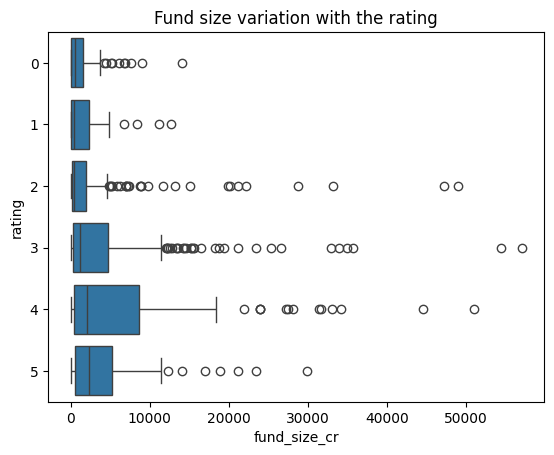

In [43]:
# fund size vs rating

#plt.figure(figsize=(12,8))
sns.boxplot(df,x='fund_size_cr',y='rating',orient='h')
plt.title('Fund size variation with the rating')
plt.show()

Conclusion
- People seems to be interested in investing higher rated funds. We will see if ratings have any impact on returns in further slides.

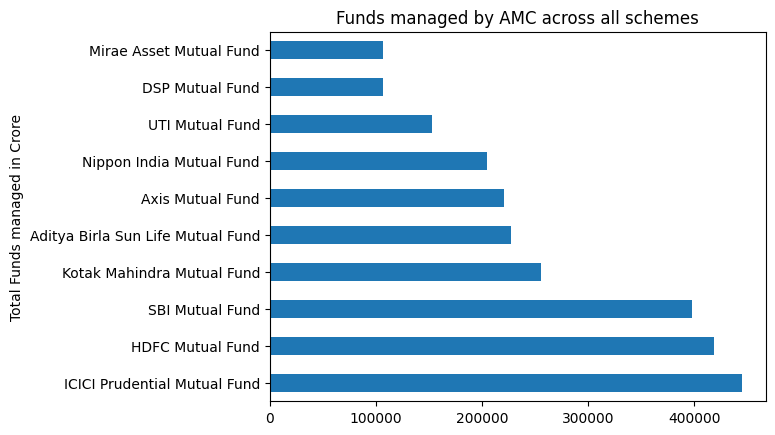

In [45]:
# top 10 AMC by sum of funds managed
df.groupby('amc_name')['fund_size_cr'].sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.ylabel('Total Funds managed in Crore')
plt.title('Funds managed by AMC across all schemes')
plt.show()

Conlusion:
- ICICI Prudential Mutual Fund has received the highest funds collectively. (Popular AMC)

## Analysis on fund age

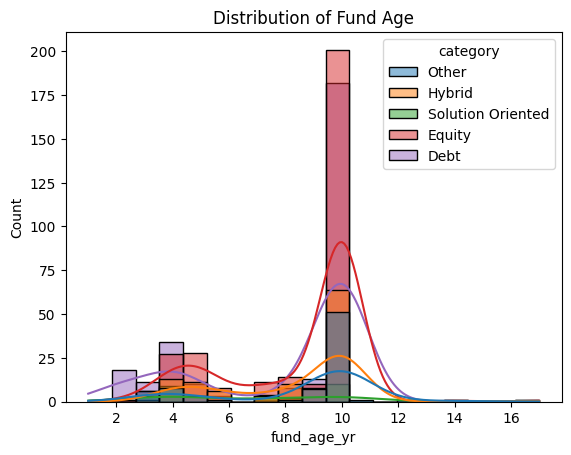

In [50]:
sns.histplot(df,x='fund_age_yr',hue='category',kde=True)
plt.title('Distribution of Fund Age')
plt.show()

Findings
- Recent funds are mostly Debt funds
- More than 4 year age funds are Equity type followed by Debt.

## Analysis on risk level

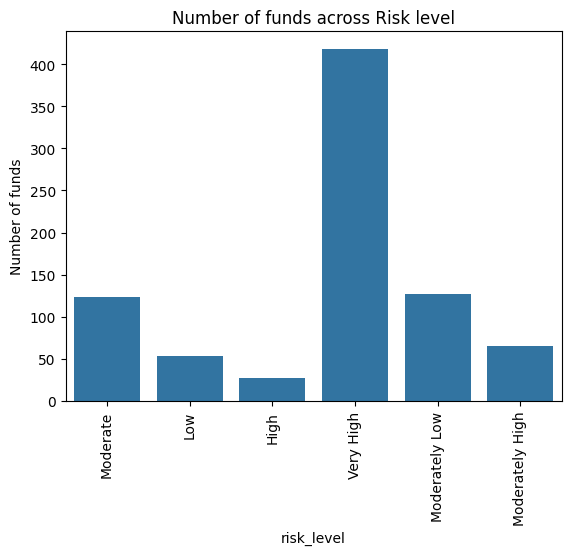

In [52]:
# total no of schemes in each risk level
sns.countplot(df,x='risk_level')
plt.title('Number of funds across Risk level')
plt.ylabel('Number of funds')
plt.xticks(rotation='vertical')
plt.show()

Conclusion
- Most of the schemes have risk level Very High

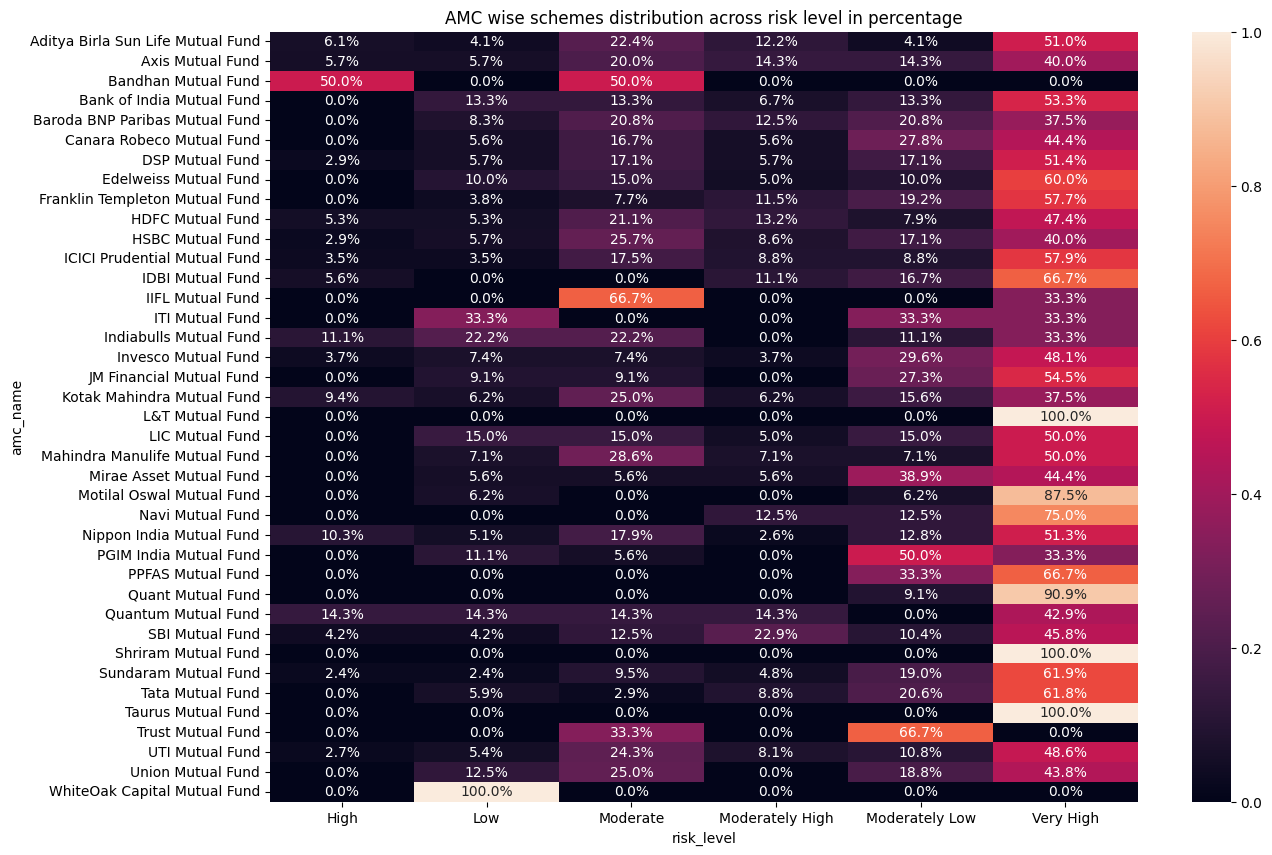

In [53]:
# amc and risk level
plt.figure(figsize=(14,10))
sns.heatmap(pd.crosstab(df['amc_name'],df['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('AMC wise schemes distribution across risk level in percentage')
plt.show()

Conclusion
- Most of the AMCs have schemes with risk level 6(Very High).
- Taurus, Shriram and L&T have 100% in Very High Risk category.

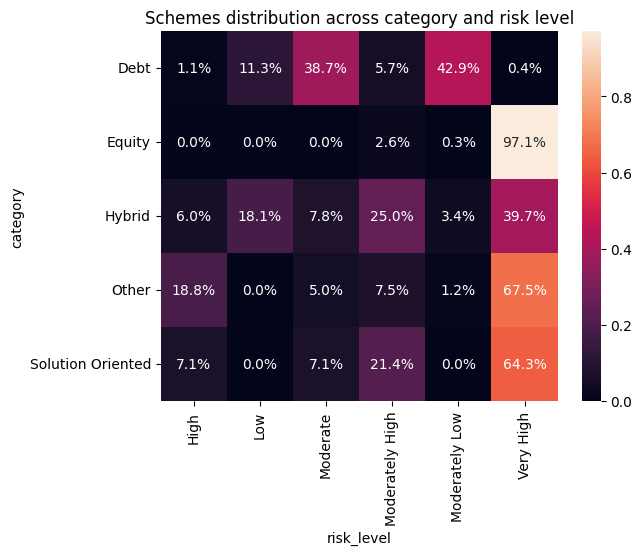

In [54]:
# category and risk level
sns.heatmap(pd.crosstab(df['category'],df['risk_level'],normalize='index'),annot=True,fmt='.1%')
plt.title('Schemes distribution across category and risk level')
plt.show()

Findings
- Low, Moderate and Moderately Low are dominated by Debt Funds
- Moderately High, High and very High are dominated by Equity Funds

/tmp/ipython-input-2576422025.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())
/tmp/ipython-input-2576422025.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())
/tmp/ipython-input-2576422025.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())


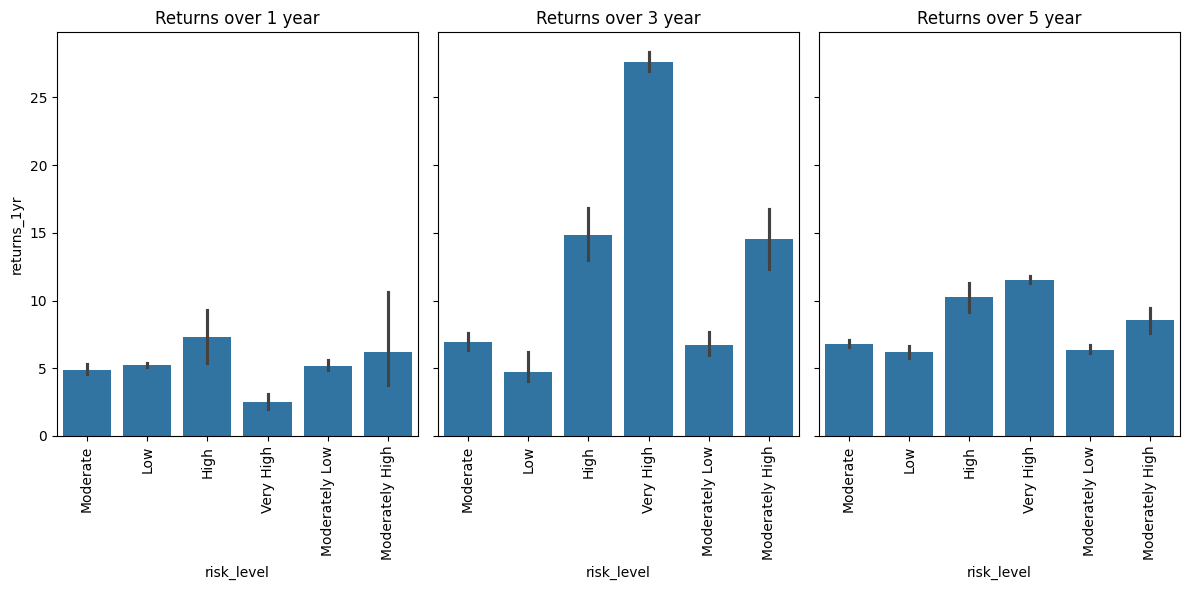

In [57]:
# high risk level means high returns ??

# Create figure and axis objects
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6),sharey='row')

# Create a bar plot for each axis
sns.barplot(df,x='risk_level',y='returns_1yr',ax=axes[0])
sns.barplot(df,x='risk_level',y='returns_3yr',ax=axes[1])
sns.barplot(df,x='risk_level',y='returns_5yr',ax=axes[2])

# Set the title for each axis
axes[0].set_title('Returns over 1 year')
axes[0].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())
axes[1].set_title('Returns over 3 year')
axes[1].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())
axes[2].set_title('Returns over 5 year')
axes[2].set_xticklabels(rotation='vertical',labels=df['risk_level'].unique())

plt.tight_layout()
plt.show()

Findings -
- In 3 and 5 years returns have a positive relation with risk level.
- It clearly shows that high risk funds should be held for longer time to get more returns.

## Analysis on AMC

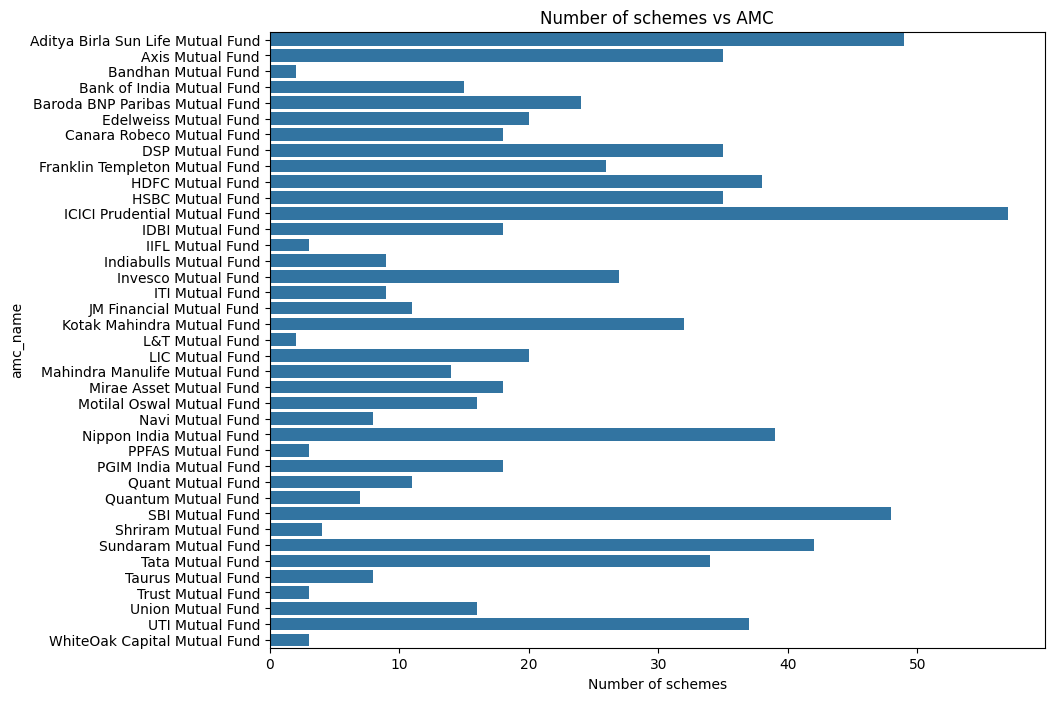

In [58]:
# distribution of amc
plt.figure(figsize=(10,8))
sns.countplot(df,y='amc_name')
plt.title('Number of schemes vs AMC')
plt.xlabel('Number of schemes')
plt.show()

Findings- ICICI has around 57 schemes running

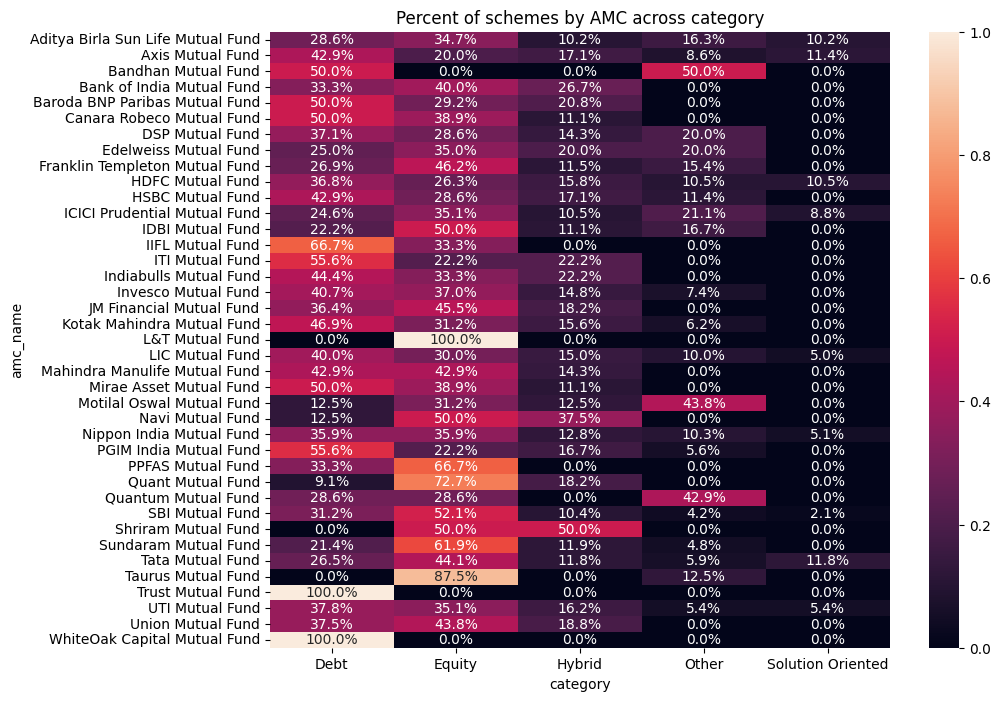

In [60]:
# amc name vs category
plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(df['amc_name'],df['category'],normalize='index'),annot=True,fmt='.1%')
plt.title('Percent of schemes by AMC across category')
plt.show()

Findings -
- Most of the AMC have funds in Debt and Equity category.

## Analysis of Rating

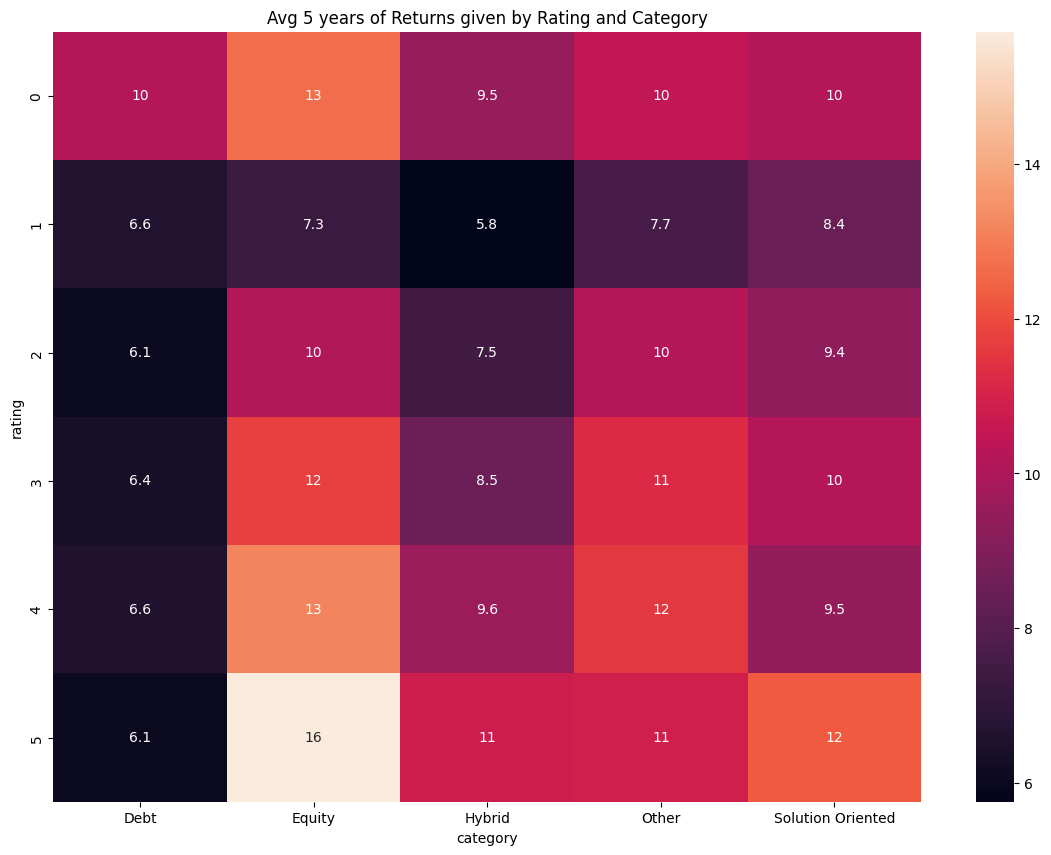

In [67]:
plt.figure(figsize=(14,10))
sns.heatmap(pd.pivot_table(df,index='rating',columns='category',values='returns_5yr'),annot=True,fmt='.2g')
plt.title('Avg 5 years of Returns given by Rating and Category')
plt.show()

Findings
- Leaving 0 rating category, we can say that higher the rating higher returns.

## Analysis on category

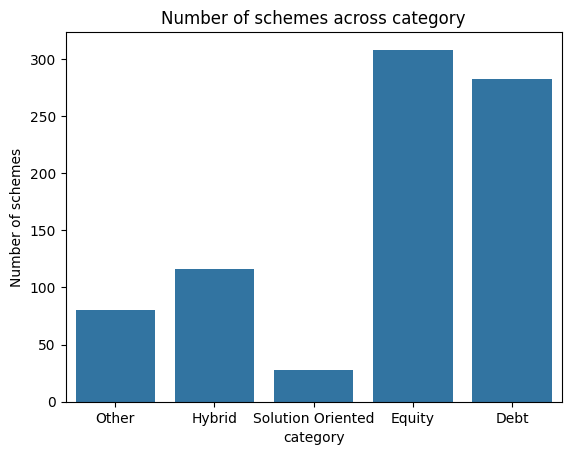

In [69]:
# distribution of category
sns.countplot(df,x='category')
plt.title('Number of schemes across category')
plt.ylabel('Number of schemes')
plt.show()

Findings -
Among category most of the schemes are Equity or Debt type

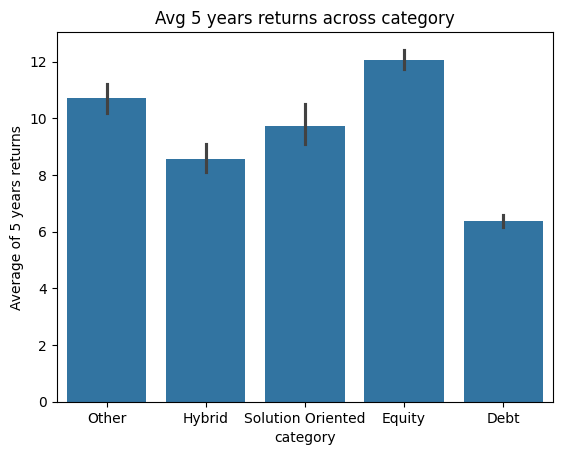

In [70]:
sns.barplot(df,x='category',y='returns_5yr')
plt.title('Avg 5 years returns across category')
plt.ylabel('Average of 5 years returns')
plt.show()

Findings -
Equity has given highest return

This notebook is for Educational purpose only and one should check with there advisor before investing in mutual funds.